In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Set English stopwords
stopwords = set(stopwords.words('english'))

# Import PyTorch libraries
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Import sklearn libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Import other necessary libraries
import os
from tqdm import tqdm
tqdm.pandas() # Enable progress_apply for Pandas DataFrame
from collections import Counter

# Now that all necessary libraries are imported, you can start writing your code.
# Each library serves a specific purpose:
# - Pandas: Data manipulation and analysis
# - NumPy: Numerical computing
# - Matplotlib: Data visualization
# - Seaborn: Data visualization enhancement
# - NLTK: Natural Language Toolkit for NLP tasks
# - Torch: PyTorch deep learning framework
# - Scikit-learn: Machine learning library
# - tqdm: Progress bar visualization for loops
# - collections: Data structures and utilities for counting

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# Import the necessary library to mount Google Drive
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the CSV file using Pandas
data = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv", encoding='latin1')
# Display the loaded data
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
# print summary info on each column of the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
# This provides a count of positive and negative sentiment labels in the dataset
data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
# show the number of missing rows in each column
print(data.isna().sum())

review       0
sentiment    0
dtype: int64


In [7]:
# print unique values in the sentiment column
print(data.sentiment.unique())

['positive' 'negative']


<ipython-input-8-adf0c03ae822>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["sentiment"], palette=["green", "red"])


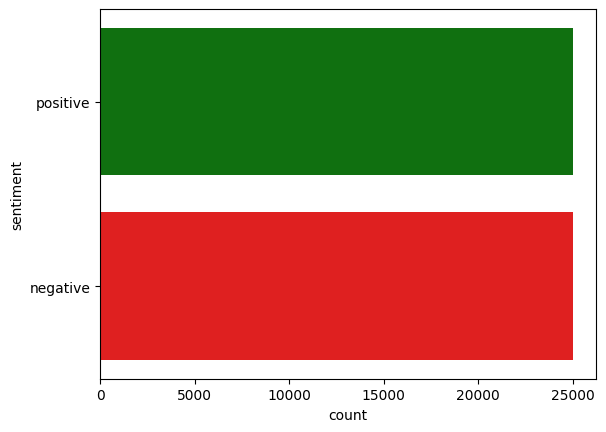

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [8]:
# Import seaborn library for data visualization
import seaborn as sns

# Use seaborn's countplot to visualize the distribution of sentiment labels
sns.countplot(data["sentiment"], palette=["green", "red"])

# Display the plot
plt.show()

# Print the count of each sentiment label to provide numerical information alongside the plot
print(data.sentiment.value_counts())

In [9]:
# Convert sentiment labels to binary values
# Iterate through each sentiment label in the 'sentiment' column of the DataFrame
# If the sentiment label is 'positive', assign the value 1, otherwise assign 0
data.sentiment = [1 if each == "positive" else 0 for each in data.sentiment]

In [10]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
def gen_freq(text):
    #will store all the words in list
    words_list = []

    #Loop over all the words and extract word from list
    for word in text.split():
        words_list.extend(word)

    #Generate word frequencies using value counts in word_list
    word_freq = pd.Series(words_list).value_counts()

    #print top 100 words
    word_freq[:100]

    return word_freq

In [12]:
freq = gen_freq(data.review.str)
freq

the             568730
a               306958
and             301914
of              283620
to              261848
                 ...  
scab                 1
"Doll                1
mystery".            1
Silence"!            1
Yosemite.<br         1
Length: 439595, dtype: int64

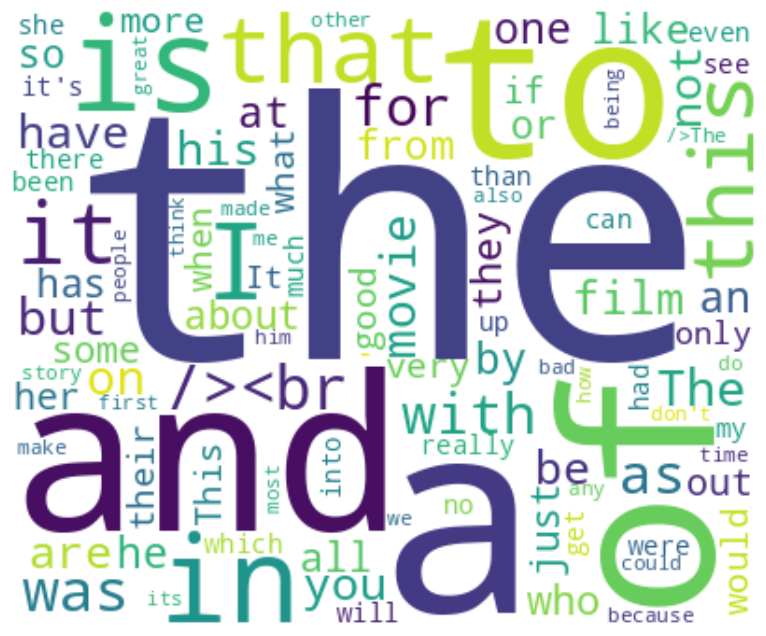

In [13]:
# Import the WordCloud library
from wordcloud import WordCloud

# Generate a WordCloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(freq)

# Create a new figure for the WordCloud plot
plt.figure(figsize=(14, 8))

# Display the WordCloud
# 'interpolation' parameter is set to 'bilinear' for smooth image display
plt.imshow(wc, interpolation='bilinear')

# Turn off the axis for a cleaner plot
plt.axis('off')

# Show the plot
plt.show()

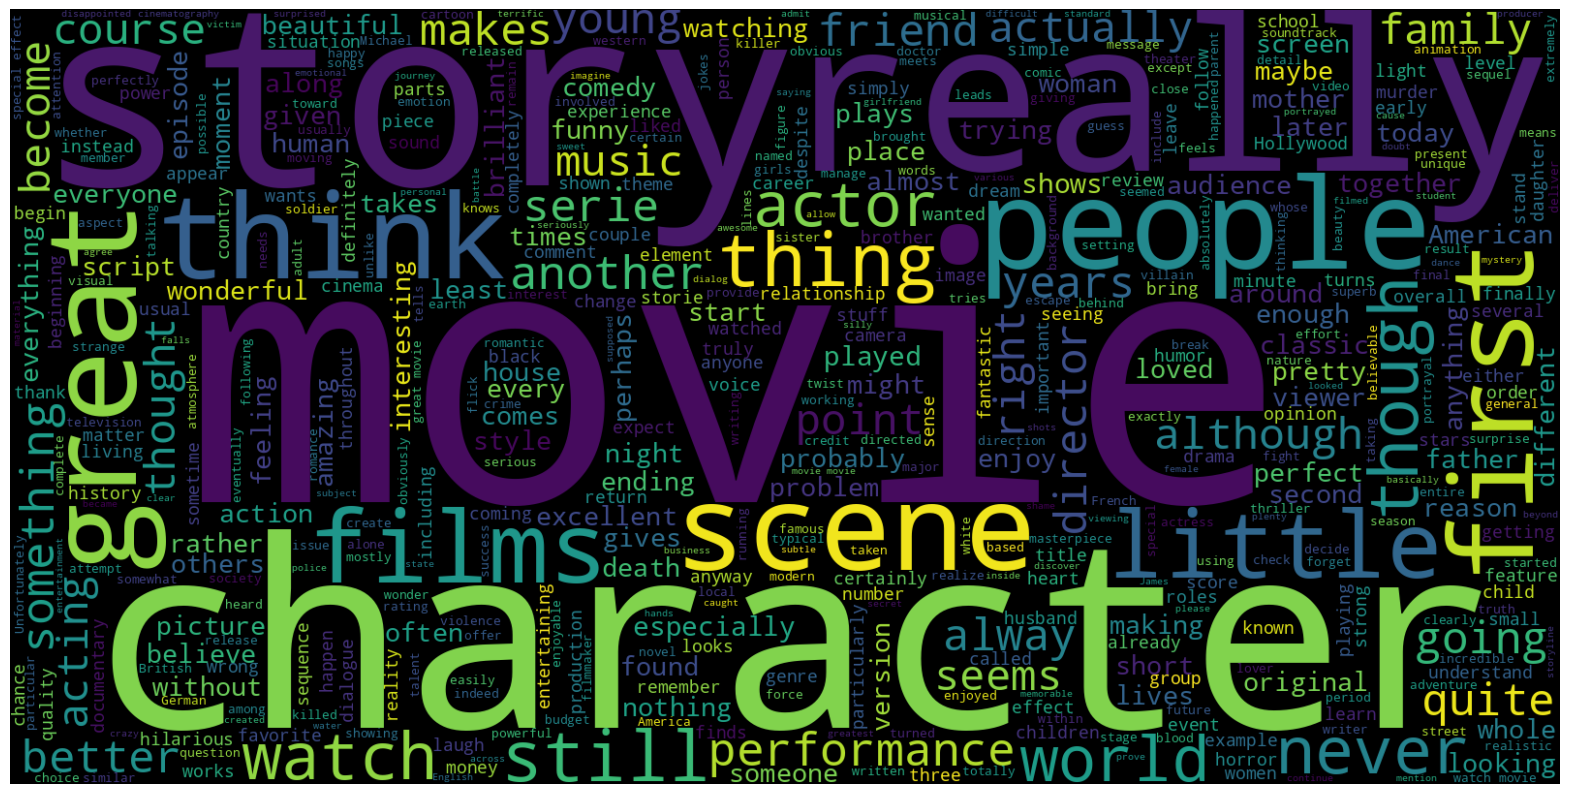

In [14]:
# Set the size of the figure for the WordCloud plot
plt.figure(figsize=(20, 20))

# Generate a WordCloud from the positive sentiment reviews in the 'review' column of the DataFrame
# Parameters such as max_words, width, height, and min_word_length are specified
Wc = WordCloud(max_words=500, width=1600, height=800, min_word_length=5).generate(" ".join(data[data.sentiment == 1].review))

# Turn off the axis for a cleaner plot
plt.axis("off")

# Display the WordCloud plot
# 'interpolation' parameter is set to 'bilinear' for smooth image display
plt.imshow(Wc, interpolation='bilinear')

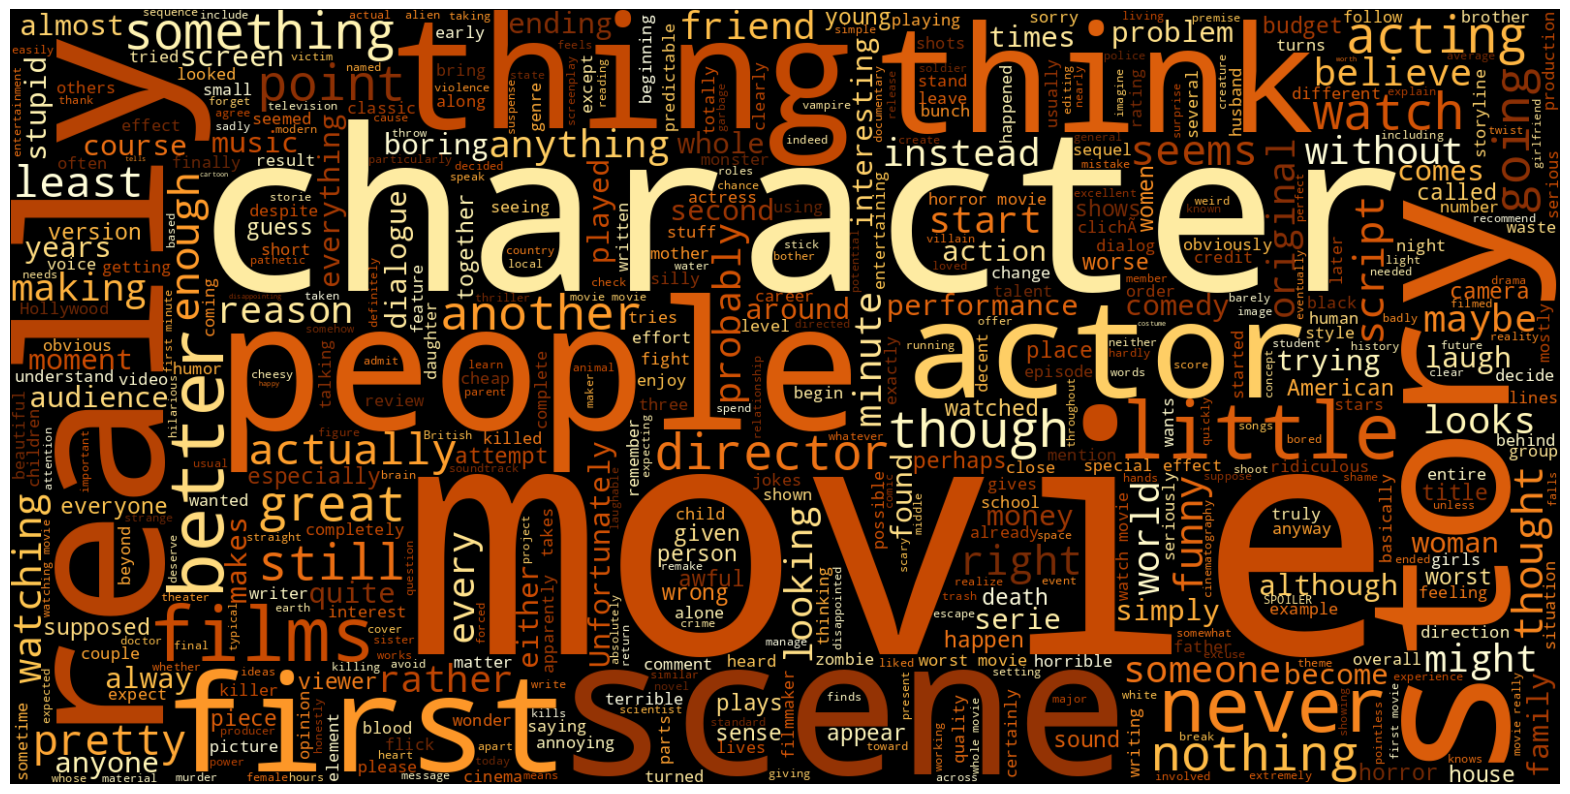

In [15]:
# Set the size of the figure for the WordCloud plot
plt.figure(figsize=(20, 20))

# Generate a WordCloud from the negative sentiment reviews in the 'review' column of the DataFrame
# Parameters such as max_words, width, height, colormap, and min_word_length are specified
Wc = WordCloud(max_words=500, width=1600, height=800, colormap="YlOrBr", min_word_length=5).generate(" ".join(data[data.sentiment == 0].review))

# Turn off the axis for a cleaner plot
plt.axis("off")

# Display the WordCloud plot
# 'interpolation' parameter is set to 'bilinear' for smooth image display
plt.imshow(Wc, interpolation='bilinear')

In [16]:
# Set a fixed random state for reproducibility
random_state = 42

# Define a function to print a random review
def print_random_review() -> None:
    # Select a random review from the 'review' column of the DataFrame
    # 'n=1' specifies that only one review will be sampled
    # 'random_state=random_state' ensures reproducibility of the random sampling
    random_review = data.review.sample(n=1, random_state=random_state).values

    # Print the selected random review
    print(random_review[0])

# Call the function to print a random review
print_random_review()

I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the

In [17]:
# Import the 're' module for regular expressions
import re

# Define a function to remove HTML tags from text
def remove_html_tags(text: str) -> str:
    # Define a regular expression pattern to match HTML tags
    pattern = re.compile('<.*?>')

    # Use the sub() method to replace all matches of the pattern with an empty string
    return pattern.sub(r'', text)

# Apply the remove_html_tags function to each review in the 'review' column of the DataFrame
data['review'] = data.review.apply(remove_html_tags)

# Call the print_random_review function to print a random review after removing HTML tags
print_random_review()

# Print the DataFrame to show that HTML tags have been removed from the 'review' column
data

I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [18]:
# Define a function to remove URLs from text
def remove_urls(text: str) -> str:
    # Define a regular expression pattern to match URLs
    # The pattern matches URLs starting with http or https followed by any non-whitespace characters
    # It also matches URLs starting with www followed by any non-whitespace characters
    pattern = re.compile(r'https?://\S+|www\.\S+', flags=re.IGNORECASE)

    # Use the sub() method to replace all matches of the pattern with an empty string
    return pattern.sub(r'', text)

# Apply the remove_urls function to each review in the 'review' column of the DataFrame
data['review'] = data.review.apply(remove_urls)

# Call the print_random_review function to print a random review after removing URLs
print_random_review()

# Print the DataFrame to show that URLs have been removed from the 'review' column
data

I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [19]:
# Convert the text in the 'review' column to lowercase
data['review'] = data.review.str.lower()

# Call the print_random_review function to print a random review after converting text to lowercase
print_random_review()

# Print the DataFrame to show that text in the 'review' column has been converted to lowercase
data

i really liked this summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. anyways, this could have been one of the best summerslam's ever if the wwf didn't have lex luger in the main event against yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but i'm glad times have changed. it was a terrible main event just like every match luger is in is terrible. other matches on the card were razor ramon vs ted dibiase, steiner brothers vs heavenly bodies, shawn michaels vs curt hening, this was the event where shawn named his big monster of a body guard diesel, irs vs 1-2-3 kid, bret hart first takes on doink then takes on jerry lawler and stuff with the harts and lawler was always very interesting, then ludvig borga destroyed marty jannetty, undertaker took on giant gonzalez in another terrible match, the smoking gunns and tatanka took on bam bam bigelow and the headshrinkers, and yokozuna defended the

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


In [20]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Retrieve the set of stopwords for the English language from NLTK
stop_words_set = set(stopwords.words('english'))

# Print the set of stopwords
print(stop_words_set)

# Define a function to remove stopwords from text
def remove_stop_words(text: str) -> str:
    # Split the text into a list of words and iterate through each word
    # Only include words that are not in the stop_words_set
    words = [word for word in text.split() if word not in stop_words_set]
    # Join the remaining words back into a single string
    return " ".join(words)

# Apply the remove_stop_words function to each review in the 'review' column of the DataFrame
data['review'] = data.review.apply(remove_stop_words)

# Call the print_random_review function to print a random review after removing stopwords
print_random_review()

{'mightn', 'he', 'very', 're', 'should', 'shan', "it's", "mightn't", 'these', "you'd", 'to', 'both', 'more', 'by', 'into', 'mustn', 'ain', 'before', 'are', 'yourselves', 'for', 'few', 'because', 'after', 'd', 'any', "weren't", 'again', 'such', 'each', 'wasn', 'than', 'an', 'while', 'will', 'him', 'only', "wouldn't", "shan't", 'it', 'hers', 'some', 'did', 'we', 'yourself', 'this', 'having', 's', 'no', 'weren', 'over', "wasn't", 'nor', 'above', 'now', 'doesn', "hasn't", 'in', "doesn't", 'was', 'or', "couldn't", 'you', 'is', "didn't", 'their', 'further', 'they', 'itself', 'below', 'didn', 'my', 'me', "should've", "you've", 'of', 'were', 'there', "you'll", "mustn't", 'do', 'does', 've', 'our', 'whom', 'and', 'how', "don't", 'which', 'most', 'so', 'why', 'up', 'been', 'll', 'down', 'haven', "you're", "she's", 'i', 'what', 'where', 'am', 'had', 'from', 'be', 't', 'who', 'that', "haven't", 'about', 'at', "aren't", 'hasn', "that'll", 'his', 'out', 'ma', "shouldn't", 'yours', 'other', 'can', 'i

In [22]:
# Import the 'string' module for accessing string-related operations
import string

# Define a function to remove punctuations from text
def remove_punctuations(text: str) -> str:
    # Use the translate() method to remove punctuations from the text
    # str.maketrans('', '', string.punctuation) creates a translation table
    # that maps each punctuation character to None, effectively removing them
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the remove_punctuations function to each review in the 'review' column of the DataFrame
data['review'] = data.review.apply(remove_punctuations)

# Call the print_random_review function to print a random review after removing punctuations
print_random_review()

# Display the modified DataFrame after removing punctuations from reviews
data

really liked summerslam due look arena curtains look overall interesting reason anyways could one best summerslams ever wwf lex luger main event yokozuna time ok huge fat man vs strong man im glad times changed terrible main event like every match luger terrible matches card razor ramon vs ted dibiase steiner brothers vs heavenly bodies shawn michaels vs curt hening event shawn named big monster body guard diesel irs vs 123 kid bret hart first takes doink takes jerry lawler stuff harts lawler always interesting ludvig borga destroyed marty jannetty undertaker took giant gonzalez another terrible match smoking gunns tatanka took bam bam bigelow headshrinkers yokozuna defended world title lex luger match boring terrible ending however deserves 810


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job creative original...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment side maltin...,0


In [23]:
# Remove digits from text using regular expression
# \d+ matches one or more digits
# r'' specifies an empty string, effectively removing digits from the text
# regex=True ensures that the replacement is applied as a regular expression
data['review'] = data.review.str.replace(r'\d+', r'', regex=True)

# Call the print_random_review function to print a random review after removing digits
print_random_review()

really liked summerslam due look arena curtains look overall interesting reason anyways could one best summerslams ever wwf lex luger main event yokozuna time ok huge fat man vs strong man im glad times changed terrible main event like every match luger terrible matches card razor ramon vs ted dibiase steiner brothers vs heavenly bodies shawn michaels vs curt hening event shawn named big monster body guard diesel irs vs  kid bret hart first takes doink takes jerry lawler stuff harts lawler always interesting ludvig borga destroyed marty jannetty undertaker took giant gonzalez another terrible match smoking gunns tatanka took bam bam bigelow headshrinkers yokozuna defended world title lex luger match boring terrible ending however deserves 


In [24]:
# Import the Word class from the textblob module
from textblob import Word

# Download NLTK's WordNet resource for lemmatization
nltk.download('wordnet')

# Define a function to lemmatize words in text
def lemmatize_words(text: str) -> str:
    # Split the text into words and lemmatize each word using the Word class from textblob
    # The lemmatize() method is used to find the base form of each word
    words = [Word(word).lemmatize() for word in text.split()]

    # Join the lemmatized words back into a single string
    return " ".join(words)

# Apply the lemmatize_words function to each review in the 'review' column of the DataFrame
data['review'] = data.review.apply(lemmatize_words)

# Call the print_random_review function to print a random review after lemmatizing words
print_random_review()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


really liked summerslam due look arena curtain look overall interesting reason anyways could one best summerslams ever wwf lex luger main event yokozuna time ok huge fat man v strong man im glad time changed terrible main event like every match luger terrible match card razor ramon v ted dibiase steiner brother v heavenly body shawn michael v curt hening event shawn named big monster body guard diesel irs v kid bret hart first take doink take jerry lawler stuff hart lawler always interesting ludvig borga destroyed marty jannetty undertaker took giant gonzalez another terrible match smoking gunns tatanka took bam bam bigelow headshrinkers yokozuna defended world title lex luger match boring terrible ending however deserves


In [25]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# x_train and y_train represent features and labels for the training set
# x_test and y_test represent features and labels for the testing set
# The 'review' column values are used as features and the 'sentiment' column values as labels
# test_size=.2 specifies that 20% of the data will be used for testing, and 80% for training
# random_state=random_state ensures reproducibility of the split with a fixed random state
# stratify=data.sentiment.values ensures that the proportion of each sentiment label is preserved in both the training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    data.review.values,
    data.sentiment.values,
    test_size=.2,
    random_state=random_state,
    stratify=data.sentiment.values
)

In [26]:
x_train

array(['caught little gem totally accident back revival theatre see two old silly scifi movie theatre packed full with warning showed bunch scifi short spoof to get u mood somewhat amusing came and within second audience hysteric biggest laugh came showed princess laia huge cinnamon bun instead hair head look camera give grim smile nod made even funnier gotta see chewabacca played look like muppet extremely silly stupidbut stop laughing dialogue drowned laughter also know star war pretty well even funnierthey deliberately poke fun dialogue really work audience definite',
       'cant believe let movie accomplish favor friend ask early april movie certainly pain as theater sickly boring even felt gory impact daunting scene deem complete failure attract audience worst even trampled me cause friend failed come time theater busy assisting boyfriend looking appropriate lodge stay one night really disappointed matter movie matter indeed me poor plot useless storyline naively created know say

In [27]:
x_test

array(['yes mtv really way market daria started clever teenage angstcomment everything suck make viewer feel better sucky teenage life sitcom mutated how deal problemscharade used watch daria time loved it now sitting watching called movie wonder point wa daria tell u lead life college excuse me point daria made every episode like ok long ok matter rest sick sad world think it entire thing reminded scene reality bite movie channel show documentry first time',
       'story bride fair amusing engaging one filmmaker credit set portray rural minnesotan respect ordinarily reserved coastdwellers weird though find independent movie brainchild single person unambitious clichã©ridden committeebrewed hollywood potboilerthe portrait rural people intended affectionate think character ring true mei quite meal smalltown diner never overheard debate merit different nineteenthcentury english novelist one might suggest writerdirector semans experience rural culture coen brother considerably le satiric

In [28]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
y_test

array([0, 0, 1, ..., 0, 1, 0])

In [30]:
# Import the CountVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
# This will convert a collection of text documents into a matrix of token counts
vectorizer = CountVectorizer()

# Fit the vectorizer on the training set and transform them into feature vectors
# The fit_transform method learns the vocabulary dictionary and returns the term-document matrix
# This matrix represents the occurrence of each word (token) in the training set
X_train = vectorizer.fit_transform(x_train)

# Transform the test set into feature vectors using the same vocabulary as the training set
# The transform method uses the vocabulary learned from the training set to transform the test set
# It represents the occurrence of each word in the test set using the same terms as the training set
X_test = vectorizer.transform(x_test)

In [31]:
# Import necessary modules and classes
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt

In [32]:
# Import the Multinomial Naive Bayes classifier from the sklearn.naive_bayes module
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Train the classifier using the training data
# X_train contains the feature vectors of the training set
# y_train contains the corresponding labels of the training set
mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [33]:
#To make predictions on the test set.
y_test_pred = mnb_classifier.predict(X_test)

In [34]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(y_test, y_test_pred)
y_test_pred_accuracy

0.8575

In [35]:
# classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5000
           1       0.87      0.84      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [36]:
# confusion matrix for the test set
print(confusion_matrix(y_test, y_test_pred))

[[4368  632]
 [ 793 4207]]


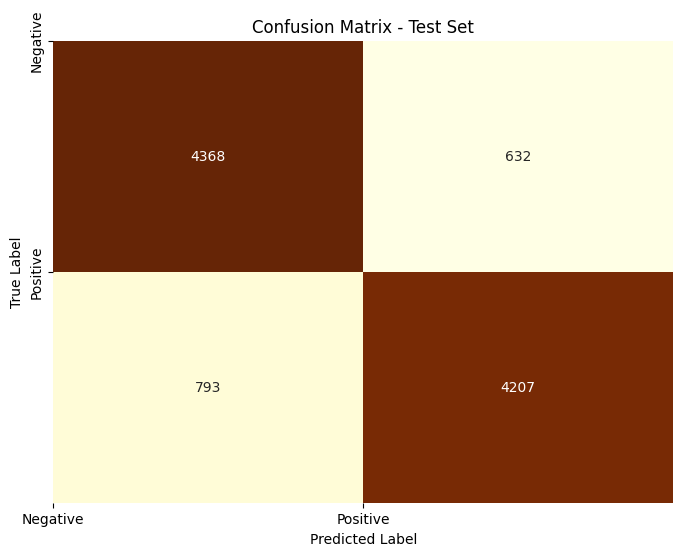

In [37]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlOrBr', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Show the plot
plt.show()

In [38]:
# Import the RandomForestClassifier from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with max_depth set to 20
rf_classifier = RandomForestClassifier(max_depth=20)

# Train the classifier using the training data
# X_train contains the feature vectors of the training set
# y_train contains the corresponding labels of the training set
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [39]:
#To make predictions on the test set.
y_test_pred = rf_classifier.predict(X_test)

In [40]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(y_test, y_test_pred)
y_test_pred_accuracy

0.8408

In [41]:
# classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      5000
           1       0.82      0.87      0.85      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [42]:
# confusion matrix for the test set
print(confusion_matrix(y_test, y_test_pred))

[[4046  954]
 [ 638 4362]]


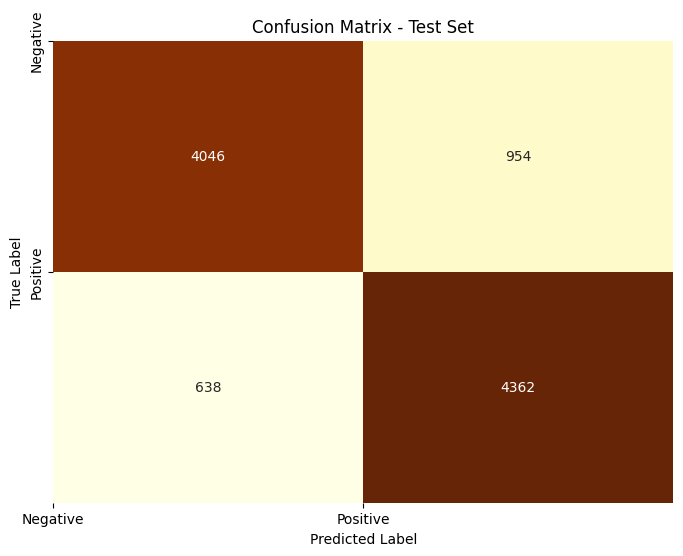

In [43]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlOrBr', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Show the plot
plt.show()

In [44]:
# Import the DecisionTreeClassifier from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree classifier with max_depth set to 100
dtree_classifier = DecisionTreeClassifier(max_depth=100)

# Train the classifier using the training data
# X_train contains the feature vectors of the training set
# y_train contains the corresponding labels of the training set
dtree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100)

In [45]:
#To make predictions on the test set.
y_test_pred = dtree_classifier.predict(X_test)

In [46]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(y_test, y_test_pred)
y_test_pred_accuracy

0.7357

In [47]:
# classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      5000
           1       0.73      0.74      0.74      5000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [48]:
# confusion matrix for the test set
print(confusion_matrix(y_test, y_test_pred))

[[3655 1345]
 [1298 3702]]


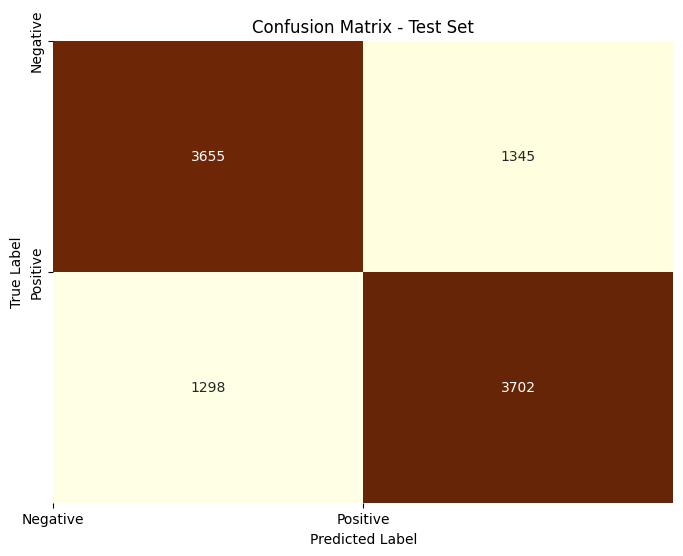

In [49]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlOrBr', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Show the plot
plt.show()

In [50]:
# Import the GradientBoostingClassifier from the sklearn.ensemble module
from sklearn.ensemble import GradientBoostingClassifier

# Initialize a Gradient Boosting classifier
gboost_classifier = GradientBoostingClassifier()

# Train the classifier using the training data
# X_train contains the feature vectors of the training set
# y_train contains the corresponding labels of the training set
gboost_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
#To make predictions on the test set.
y_test_pred = gboost_classifier.predict(X_test)

In [52]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(y_test, y_test_pred)
y_test_pred_accuracy

0.8061

In [53]:
# classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.79      5000
           1       0.77      0.87      0.82      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [54]:
# confusion matrix for the test set
print(confusion_matrix(y_test, y_test_pred))

[[3733 1267]
 [ 672 4328]]


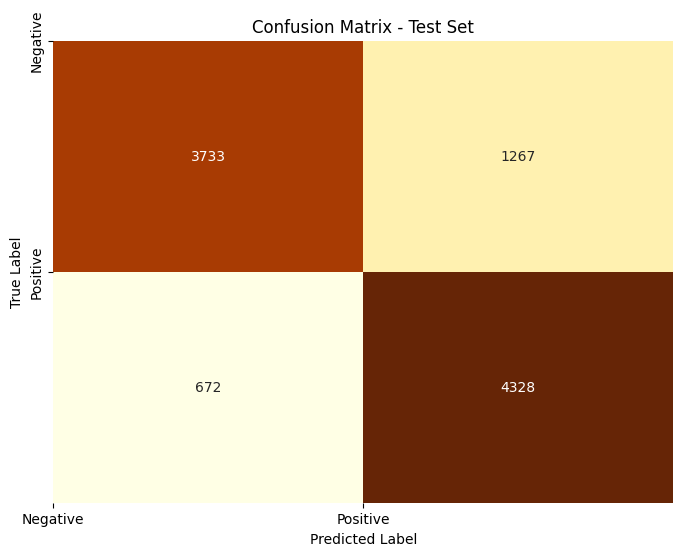

In [55]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlOrBr', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Show the plot
plt.show()

In [56]:
# Import the XGBClassifier from the xgboost module
from xgboost import XGBClassifier

# Initialize an XGBoost classifier
xgboost_classifier = XGBClassifier()

# Train the classifier using the training data
# X_train contains the feature vectors of the training set
# y_train contains the corresponding labels of the training set
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
#To make predictions on the test set.
y_test_pred = xgboost_classifier.predict(X_test)

In [58]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(y_test, y_test_pred)
y_test_pred_accuracy

0.8555

In [59]:
# classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      5000
           1       0.85      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [60]:
# confusion matrix for the test set
print(confusion_matrix(y_test, y_test_pred))

[[4207  793]
 [ 652 4348]]


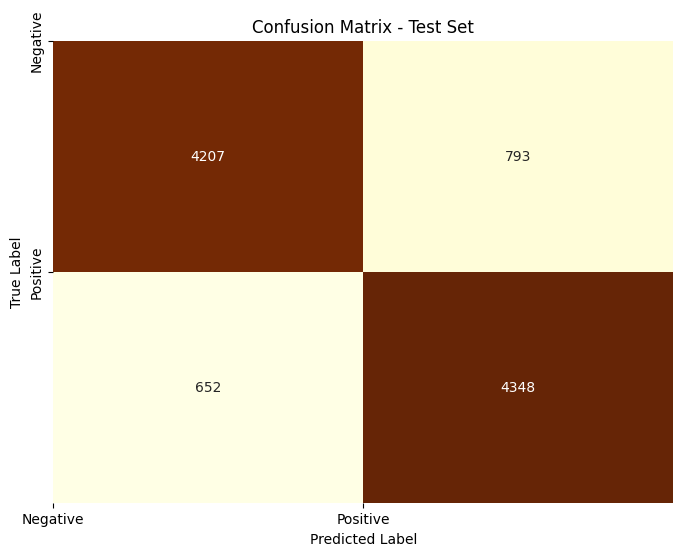

In [61]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlOrBr', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Show the plot
plt.show()

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

K.clear_session()

max_words = 100000  # Maximum number of words to keep in the vocabulary
max_len = 1000  # Maximum length of input sequences

# tokenize the training data set
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_sequence = pad_sequences(
    tokenizer.texts_to_sequences(x_train),
    maxlen=max_len,
    padding='post'
)

X_test_sequence = pad_sequences(
    tokenizer.texts_to_sequences(x_test),
    maxlen=max_len,
    padding='post'
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Embedding, LSTM, SpatialDropout1D

# Instantiate and build the LSTM model
tf_model = Sequential()
tf_model.add(Embedding(input_dim=max_words, output_dim=128))
tf_model.add(Conv1D(128, 5, activation='relu'))
tf_model.add(SpatialDropout1D(0.4))
tf_model.add(LSTM(units=128, recurrent_dropout=0.2, dropout=0.2))
tf_model.add(Dense(units=32, activation='relu'))
tf_model.add(Dense(units=1, activation='sigmoid'))
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the tensorflow model summary
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         12800000  
                                                                 
 conv1d (Conv1D)             (None, None, 128)         82048     
                                                                 
 spatial_dropout1d (Spatial  (None, None, 128)         0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

In [ ]:
# Train the tensorflow model with training data sequence
history = tf_model.fit(X_train_sequence, y_train,
            epochs=5,
            batch_size=64,
            validation_split=0.2
)

Epoch 1/5
500/500 [==============================] - 2313s 5s/step - loss: 0.6934 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 2/5
500/500 [==============================] - 2275s 5s/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/5
500/500 [==============================] - 2282s 5s/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/5
500/500 [==============================] - 2291s 5s/step - loss: 0.6931 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 5/5
500/500 [==============================] - 2302s 5s/step - loss: 0.6985 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5011


In [ ]:
# Test and score the tensorflow model on test data sequence
loss, tf_accuracy = tf_model.evaluate(X_test_sequence, y_test)

tf_predictions = (tf_model.predict(X_test_sequence)>=0.5).astype(int)

313/313 [==============================] - 151s 481ms/step


In [ ]:
print(f'LSTM model Accuracy Score: {tf_accuracy * 100:.2f}%\n')

print('LSTM model Classification Report:\n')

print(classification_report(y_test, tf_predictions, target_names=['negative', 'positive']))

LSTM model Accuracy Score: 50.00%

LSTM model Classification Report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      5000
    positive       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Mapping from name to URL of Bert models
map_name_to_model = {
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
}

# Mapping from name to URL of respective processings for the Bert models
map_name_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

### Choose a model: Small BERT model for English language with L-4_H-128_A-2. This means the BERT model has:
# - 4 layers, i.e., 4 Transformer-encoder blocks.
# - Hidden states = 128.
# - Attention heads = 2.
# This Small BERT model is available at https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
bert_name = 'small_bert/bert_en_uncased_L-4_H-128_A-2'

# Get URLs of model and processing from tfhub
tfhub_model = map_name_to_model[bert_name]
tfhub_preprocess = map_name_to_preprocess[bert_name]

print('BERT model selected           : ' + str(tfhub_model))
print('Preprocess model auto-selected: ' + str(tfhub_preprocess))

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
# Download tensorflow datasets
!pip install tensorflow_datasets

# A dependency of the preprocessing for BERT inputs
!pip install tensorflow_text
!pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.6 MB/s eta 0:00:00


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer(tfhub_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_model)

In [ ]:
def build_model():
    text_input = keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_model, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)

    # Extract and combine output embeddings of all
    all_layer_embeddings = outputs['encoder_outputs']
    combined_embedding = tf.concat(all_layer_embeddings, axis=-1)

    # Add global average pooling layer to resize combined_embeddings
    pooled_embedding = keras.layers.GlobalAveragePooling1D()(combined_embedding)

    # Use dense layers to classify
    net = keras.layers.Dense(64, activation='relu')(pooled_embedding)
    net = keras.layers.BatchNormalization()(net)
    net = keras.layers.Dropout(0.5)(net)
    net = keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
    return keras.Model(inputs=text_input, outputs=net, name="BERT_complete_model")

# Build the complete model
model = build_model()

# Print the model architecture
model.summary()

Model: "BERT_complete_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                

In [ ]:
data_copy = data.copy()

In [ ]:
train, test = train_test_split(data_copy, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']
#splitting the train set into train and validation
Xtrain, Xval, ytrain, yval=train_test_split(Xtrain, ytrain, test_size=0.2, random_state=10)

In [ ]:
#Use learning rate scheduling to gradually adjust the learning rate
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=1000,
    end_learning_rate=0.0,
    power=1.0,
    cycle=False
)


# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Xtrain, ytrain,
                    epochs=5,
                    batch_size=64,
                    validation_data=(Xval, yval))

Epoch 1/5
500/500 [==============================] - 1113s 2s/step - loss: 0.4392 - accuracy: 0.7955 - val_loss: 0.4111 - val_accuracy: 0.8191
Epoch 2/5
500/500 [==============================] - 1045s 2s/step - loss: 0.3451 - accuracy: 0.8496 - val_loss: 0.3682 - val_accuracy: 0.8432
Epoch 3/5
500/500 [==============================] - 1062s 2s/step - loss: 0.3239 - accuracy: 0.8626 - val_loss: 0.3433 - val_accuracy: 0.8540
Epoch 4/5
500/500 [==============================] - 1092s 2s/step - loss: 0.3219 - accuracy: 0.8616 - val_loss: 0.3438 - val_accuracy: 0.8544
Epoch 5/5
500/500 [==============================] - 1024s 2s/step - loss: 0.3239 - accuracy: 0.8627 - val_loss: 0.3438 - val_accuracy: 0.8537


In [ ]:
# Test and score the tensorflow model on test data sequence
loss, bert_accuracy = model.evaluate(Xval, yval)

bert_predictions = (model.predict(Xval)>=0.5).astype(int)

250/250 [==============================] - 71s 282ms/step


In [ ]:
print(f'BERT model Accuracy Score: {bert_accuracy * 100:.2f}%\n')

print('BERT model Classification Report:\n')

print(classification_report(yval, bert_predictions, target_names=['negative', 'positive']))

BERT model Accuracy Score: 85.37%

BERT model Classification Report:

              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4004
    positive       0.84      0.87      0.86      3996

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



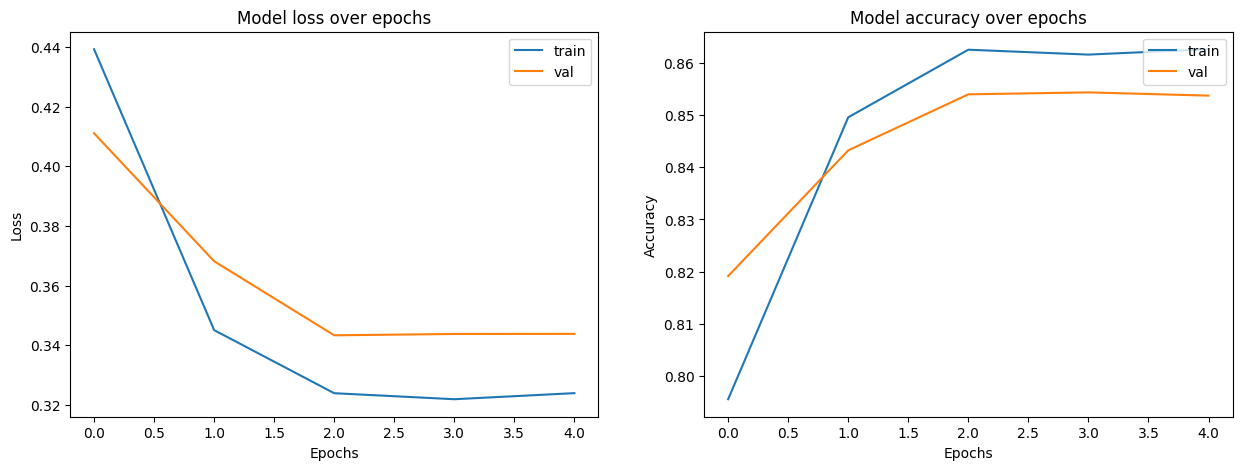

In [ ]:
# Initialize the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot model loss during training
ax1.plot(history.history["loss"])
ax1.plot(history.history["val_loss"])
ax1.legend(["train", "val"], loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Model loss over epochs")

# Plot model accuracy during training
ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
ax2.legend(["train", "val"], loc="upper right")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_title("Model accuracy over epochs")
plt.show()

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    # Create a SentimentIntensityAnalyzer object
    analyzer = SentimentIntensityAnalyzer()

    # Analyze sentiment of the text
    sentiment_scores = analyzer.polarity_scores(text)

    # Determine sentiment based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    else:
        return 'Negative'

# Example usage
text = "Despite the high expectations set by its star-studded cast and the promising premise, the movie falls flat on almost every front. The narrative is a jumbled mess, failing to establish a coherent plot or develop its characters in any meaningful way. It's as if the screenplay was cobbled together last minute, with scenes that seem disconnected from each other, leaving the audience more confused than intrigued. The dialogues are cringeworthy at best, lacking wit and often bordering on nonsensical. Even the performances, which one might expect to salvage the film, are surprisingly lackluster. It's apparent that the actors struggled with the poor material they were given, unable to breathe life into their one-dimensional characters. Visually, the movie attempts to dazzle with over-the-top special effects, but it comes off as trying too hard, masking the absence of a solid story. It's a classic case of style over substance, where even the action sequences feel gratuitous and fail to evoke any excitement. Overall, the movie is a disappointing endeavor that wastes its potential, leaving viewers with the bitter taste of missed opportunities."
sentiment = analyze_sentiment(text)
print("Sentiment:", sentiment)

Sentiment: Negative
